In [1]:
import pandas as pd

# Load the dataset
diet_data = pd.read_csv('/content/Case Study 2.csv')

# Display the first few rows of the dataset
print(diet_data.head())


  diet  preweight  weight6weeks  age
0    B         60          60.0   45
1    B        103         103.0   38
2    A         58          54.2   31
3    A         60          54.0   18
4    A         64          63.3   35


In [2]:
# Display the number of rows and columns
print(diet_data.shape)

# Get the data types of the columns
print(diet_data.dtypes)


(78, 4)
diet             object
preweight         int64
weight6weeks    float64
age               int64
dtype: object


In [3]:
# Display the statistical summary of the dataset
print(diet_data.describe())


        preweight  weight6weeks        age
count   78.000000     78.000000  78.000000
mean    72.525641     68.680769  34.025641
std      8.723344      8.924504   8.543205
min     58.000000     53.000000  18.000000
25%     66.000000     61.850000  28.250000
50%     72.000000     68.950000  34.000000
75%     78.000000     73.825000  39.000000
max    103.000000    103.000000  54.000000


diet            0
preweight       0
weight6weeks    0
age             0
weight_loss     0
dtype: int64


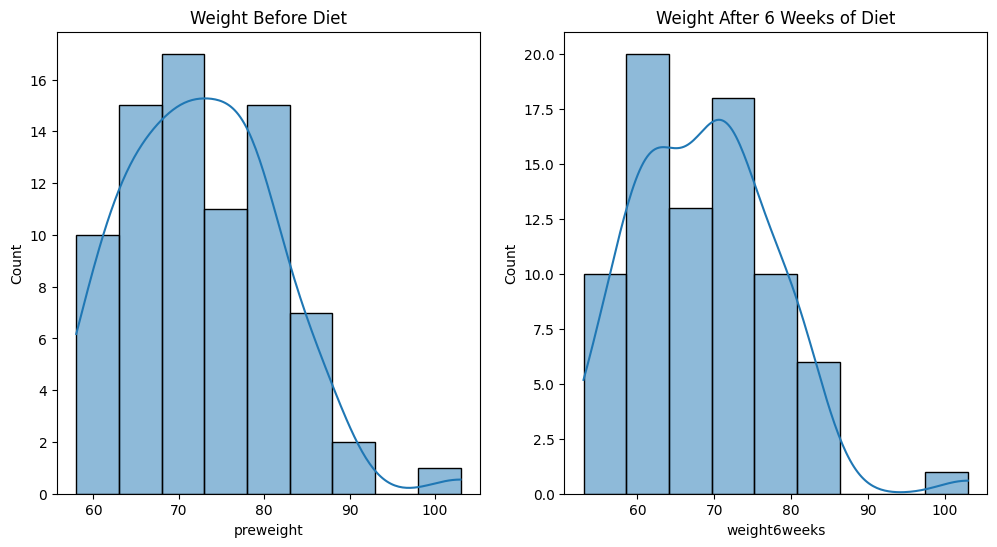

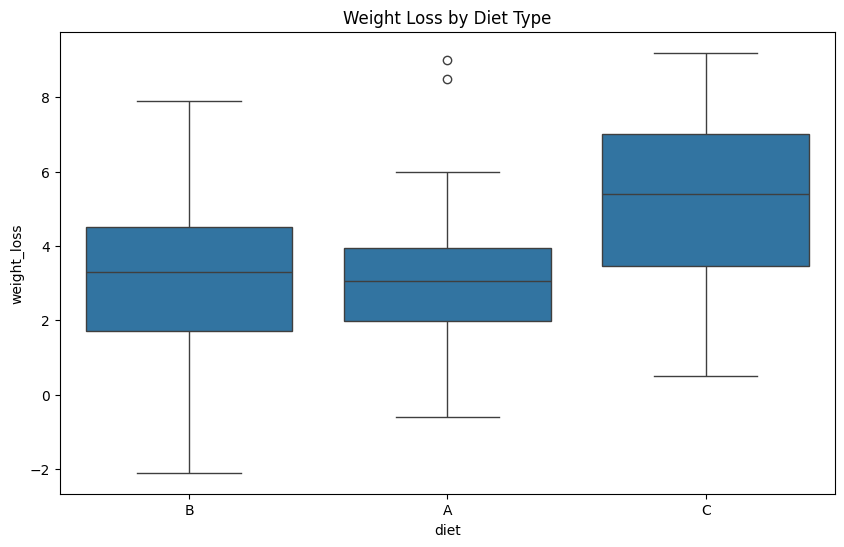

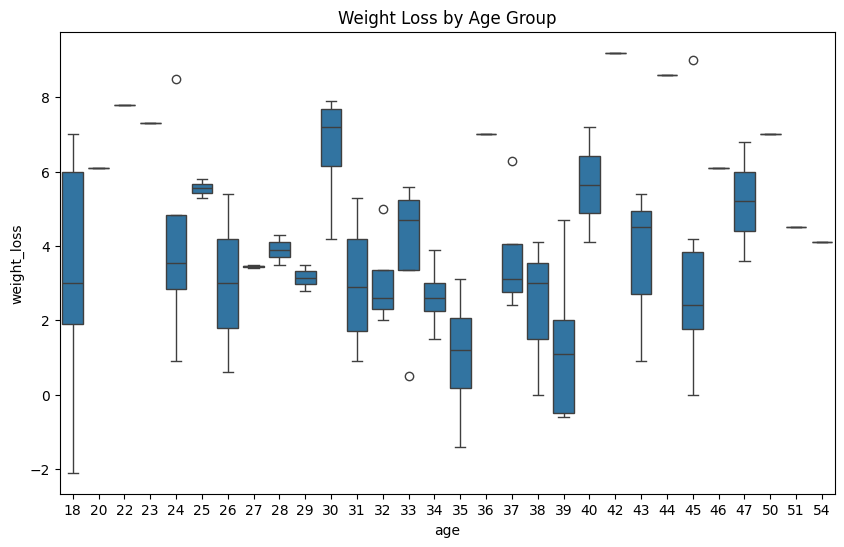

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print(diet_data.isnull().sum())

# Add a column for weight loss
diet_data['weight_loss'] = diet_data['preweight'] - diet_data['weight6weeks']

# Visualize the distribution of weights before and after the diet
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(diet_data['preweight'], kde=True)
plt.title('Weight Before Diet')

plt.subplot(1, 2, 2)
sns.histplot(diet_data['weight6weeks'], kde=True)
plt.title('Weight After 6 Weeks of Diet')
plt.show()

# Visualize the weight loss by diet type
plt.figure(figsize=(10, 6))
sns.boxplot(x='diet', y='weight_loss', data=diet_data)
plt.title('Weight Loss by Diet Type')
plt.show()

# Visualize the weight loss by age group
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='weight_loss', data=diet_data)
plt.title('Weight Loss by Age Group')
plt.show()


Hypothesis Testing

In [6]:
import scipy.stats as stats

# Perform ANOVA test for weight loss by diet type
f_stat, p_value = stats.f_oneway(
    diet_data[diet_data['diet'] == 'A']['weight_loss'],
    diet_data[diet_data['diet'] == 'B']['weight_loss'],
    diet_data[diet_data['diet'] == 'C']['weight_loss']
)

print("ANOVA test for weight loss by diet type:")
print("F-statistic:", f_stat)
print("P-value:", p_value)


ANOVA test for weight loss by diet type:
F-statistic: 6.197447453165349
P-value: 0.0032290142385893524


In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform two-way ANOVA
model = ols('weight_loss ~ C(diet) + C(age) + C(diet):C(age)', data=diet_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("Two-way ANOVA test for weight loss by diet type and age group:")
print(anova_table)


Two-way ANOVA test for weight loss by diet type and age group:
                    sum_sq    df         F    PR(>F)
C(diet)                NaN   2.0       NaN       NaN
C(age)          144.559899  29.0  1.175740  0.347895
C(diet):C(age)  377.956113  58.0  1.537004  0.123579
Residual        118.712500  28.0       NaN       NaN


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1923: RuntimeWarning: invalid value encountered in divide
  F /= J
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 29, but rank is 8
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 58, but rank is 34
  warnings.warn('covariance of constraints does not have full '
